!pip install ipywidgets

In [1]:
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt


In [2]:
def benefits_polynomial_n(action : np.ndarray, beta : list) -> np.ndarray:
    """Function calculating the benefit of player n

    Args:
        action (np.ndarray): action of player n
        beta (list): coefficient of the polynomial 

    Returns:
        np.ndarray: Benefits trajectory
    """
    b = np.zeros_like(action)
    for i in range(len(beta)):
        b += action**i * beta[i]
    return b

def cost_exponential_polynomial(y_at : np.ndarray, gamma : list) -> np.ndarray:
    """Polynomial damage function of temperature

    Args:
        y_at (np.ndarray): temperature of the upper strata
        gamma (list): coefficient of the polynomial 

    Returns:
        np.ndarray: Damage trajectory
    """
    c = np.zeros_like(y_at)
    for i in range(len(gamma)):
        c += y_at**i * gamma[i]
    return np.exp(c) 

def cost_polynomial_exponential(y_at : np.ndarray, gamma : list) -> np.ndarray:
    """Polynomial damage function of temperature

    Args:
        y_at (np.ndarray): temperature of the upper strata
        gamma (list): coefficient of the polynomial 

    Returns:
        np.ndarray: Damage trajectory
    """
    c = np.zeros_like(y_at)
    for i in range(len(gamma)):
        c += np.exp(y_at**i) * gamma[i]
    return c

def cost_polynomial(y_at : np.ndarray, gamma : list) -> np.ndarray:
    """Polynomial damage function of temperature

    Args:
        y_at (np.ndarray): temperature of the upper strata
        gamma (list): coefficient of the polynomial 

    Returns:
        np.ndarray: Damage trajectory
    """
    c = np.zeros_like(y_at)
    for i in range(len(gamma)):
        c += y_at**i * gamma[i]
    return c 

from geophysic_functions import co2_concentration_fct, force_fct, temperature_fct
from parameters import Ay, Az, By, Bz, eta, F_EX, etree, z1ref, y0, z0, c1

def temp_fct(list_actions : np.ndarray, y0: np.ndarray, z0 : np.ndarray) -> np.ndarray:
    sum_actions = np.sum(list_actions, axis=0,keepdims=True)
    concentration = co2_concentration_fct(z0, sum_actions, Az, Bz, etree)
    concentration_at = concentration[0][1:]
    force = force_fct(concentration_at, eta, z1ref, F_EX)
    y = temperature_fct(Ay, By, y0, force)
    y_atmo = y[0][1:]
    return y_atmo

def cost_fct(list_actions : np.ndarray, y0: np.ndarray, z0 : np.ndarray, gamma : list, fct: callable) -> np.ndarray:
    y_atmo = temp_fct(list_actions, y0, z0)
    return fct(y_atmo, gamma)

    
def potential_fct(all_actions, beta, gamma, fct, y0=y0, z0=z0):
    p = 0
    for n in range(len(all_actions)):

        p += benefits_polynomial_n(all_actions[n], beta[n])
    d = cost_fct(all_actions, y0, z0, gamma, fct)
    return p- d

ModuleNotFoundError: No module named 'geophysic_functions'

In [3]:
BETA = [[0,0,1], [0,0,1/2]]
GAMMA = [0,0,10]

E_MAX = [5,10]

In [4]:
x = np.linspace(0, 800,200)

def plot_fct_ln(fct=cost_polynomial, y_at=y0[0], z_at =z0[0] , g0=0, g1=1, g2=1):
#     print((eta* c1 -g1)/g2 -temp_fct(x.reshape((1,200)),y0=[[y_at],[0.0068]], z0 = z0))
    plt.figure(dpi=120)

    plt.plot(x,cost_fct( x.reshape((1,200)),fct=fct, y0=np.array([[y_at,0.0068]]).T, z0 = np.array([[z_at, 460, 1740]]).T, gamma=[g0,g1,g2]))

    plt.xlabel("Emission en GtCO2")
    plt.ylabel("Utilité en Trillion $ 2015")
    

NameError: name 'y0' is not defined

In [5]:
Bz.T @ Az @ z0

NameError: name 'Bz' is not defined

In [6]:
ipywidgets.interact(plot_fct_ln, fct=[cost_polynomial, cost_exponential_polynomial, cost_polynomial_exponential], y_at=(0,10,0.01), z_at=(0,10000,50), g0=(0,10,0.1), g1=(-10,10,0.1), g2=(-10,10,0.1))

NameError: name 'plot_fct_ln' is not defined

In [7]:
x = np.linspace(0, E_MAX[0],200)

def plot_fct_damage(fct=cost_polynomial, y_at=y0[0], z_at =z0[0], g0=0, g1=0, g2=1, b10=0, b11=0, b12=1, b20=0, b21=0, b22=1, percentage=100):
    print((eta* c1 -g1)/g2 -temp_fct(x.reshape((1,200)),y0=[[y_at],[0.0068]], z0 = z0)[0])

    plt.figure(dpi=120)

    plt.plot(x,benefits_polynomial_n(x*percentage/100,
                                     [b10, b11, b12] )
             -cost_fct(x.reshape((1,200)),
                       fct=fct,
                       y0=np.array([[y_at,0.0068]]).T,
                       z0 = np.array([[z_at, 460, 1740]]).T,
                       gamma=[g0,g1,g2]),
             label='player 1')
    
    plt.plot(x,benefits_polynomial_n(x*(100 - percentage)/100,
                                     [b20, b21, b22] )
             -cost_fct(x.reshape((1,200)),
                       fct=fct,
                       y0=np.array([[y_at,0.0068]]).T,
                       z0 = np.array([[z_at, 460, 1740]]).T,
                       gamma=[g0,g1,g2]),
             label='player 2')

    plt.xlabel("Emission en GtCO2")
    plt.ylabel("Utilité en Trillion $ 2015")
    plt.legend()

NameError: name 'y0' is not defined

In [8]:


ipywidgets.interact(plot_fct_damage,
                    fct=[cost_polynomial, cost_exponential_polynomial, cost_polynomial_exponential],
                    y_at=(0,10,0.01), z_at=(0,10000,50),
                    g0=(0,10,0.1), g1=(-10,10,0.1), g2=(0,10,0.01),
                    b10=(0,10,0.1), b11=(0,10,0.1), b12=(0,10,0.1),
                    b20=(0,10,0.1), b21=(0,10,0.1), b22=(0,10,0.1),
                    percentage =(0,100,1))

NameError: name 'plot_fct_damage' is not defined

In [ ]:
# generate x values
from pylab import figure, cm



def plot_fct(y_at=1, g0=0, g1=0, g2=1,   b10=0, b11=0, b12=1, b20=0, b21=0, b22=1, e_1 = 10, e_2 = 10):
    E_MAX = [e_1,e_2]
    a_1 = np.linspace(0, e_1, 100)
    a_2 = np.linspace(0, e_2, 100)
    grid = np.zeros(shape=(len(a_1),len(a_2)))
    plt.figure(figsize=(7,7))
    for i in range(len(a_1)):
        for j in range(len(a_2)) :
            list_action = np.array([a_1[i], a_2[j]])
            grid[i,j] = potential_fct(list_action, [[b10,b11,b12], [b20,b21,b22]], [g0,g1,g2], y0=[[y_at],[0.0068]])
    plt.contourf(grid,extent=[0,E_MAX[0],0,E_MAX[1]], levels = 40,cmap='RdGy', )
    plt.colorbar()

In [10]:
# generate x values
from pylab import figure, cm



def plot_fct(y_at=1, g0=0, g1=0, g2=1,   b10=0, b11=0, b12=1, b20=0, b21=0, b22=1, e_1 = 10, e_2 = 10):
    E_MAX = [e_1,e_2]
    a_1 = np.linspace(0, e_1, 100)
    a_2 = np.linspace(0, e_2, 100)
    grid = np.zeros(shape=(len(a_1),len(a_2)))
    plt.figure(figsize=(7,7))
    for i in range(len(a_1)):
        for j in range(len(a_2)) :
            list_action = np.array([a_1[i], a_2[j]])
            grid[i,j] = potential_fct(list_action, [[b10,b11,b12], [b20,b21,b22]], [g0,g1,g2], y0=[[y_at],[0.0068]])
    plt.contourf(grid,extent=[0,E_MAX[0],0,E_MAX[1]], levels = 40,cmap='RdGy', )
    plt.colorbar()
    print(grid.shape)

In [11]:
ipywidgets.interact(plot_fct, y_at=(0,10,0.01), g0=(0,10,.1), g1=(0,10,.1), g2=(0,10,.1), b10=(0,10,0.1), b11=(0,10,0.1), b12=(0,10,0.1),b20=(0,10,0.1), b21=(0,10,0.1), b22=(0,10,0.1), e_1=(0,50,1), e_2=(0,50,1))

interactive(children=(FloatSlider(value=1.0, description='y_at', max=10.0, step=0.01), FloatSlider(value=0.0, …

<function __main__.plot_fct(y_at=1, g0=0, g1=0, g2=1, b10=0, b11=0, b12=1, b20=0, b21=0, b22=1, e_1=10, e_2=10)>

<Figure size 504x504 with 0 Axes>

In [9]:
from pylab import figure, cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt





a_1 = np.linspace(0, E_MAX[0]*10,50)
a_2 = np.linspace(0, E_MAX[1]*10,50)

def plot3d_fct(fct=cost_polynomial,
               y_at=1, z_at=880,
               g0=0, g1=0, g2=1,
               b10=0, b11=0, b12=0,
               b20=0, b21=0, b22=0,
               angle = 0, pole =30):

    grid = np.zeros(shape=(len(a_1),len(a_2)))
    fig = plt.figure(figsize=(7,7))
    # create Axes3D
    ax = Axes3D(fig, auto_add_to_figure=False)
    ax.view_init(pole, angle)

    # add to Figure
    fig.add_axes(ax)
    for i in range(len(a_1)):
        for j in range(len(a_2)) :
            list_action = np.array([a_1[i], a_2[j]])
            grid[i,j] = potential_fct(list_action,
                                      [[b10,b11,b12], [b20,b21,b22]],
                                      [g0,g1,g2],
                                      y0=np.array([[y_at,0.0068]]).T,
                                      z0= np.array([[z_at, 460, 1740]]).T,
                                      fct=fct)
    A_1,A_2 = np.meshgrid(a_1, a_2) # grid of point
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.plot_surface(A_1, A_2, grid, cmap='viridis')#, rstride=1, cstride=1, 
                        #cmap=cm.RdBu,linewidth=0, antialiased=False)



In [10]:
ipywidgets.interact(plot3d_fct,
                    fct=[cost_polynomial, cost_exponential_polynomial, cost_polynomial_exponential],
                    y_at=(0,10,0.01), z_at=(0,10000,50),
                    g0=(0,10,1), g1=(0,10,0.01), g2=(0,10,0.01),
                    b10=(0,10,0.1), b11=(0,10,0.1), b12=(0,10,0.1),
                    b20=(0,10,0.1), b21=(0,10,0.1), b22=(0,10,0.1),
                    angle=(0,360,10), pole=(0,60,1))

interactive(children=(Dropdown(description='fct', options=(<function cost_polynomial at 0x000001798AF858B0>, <…

<function __main__.plot3d_fct(fct=<function cost_polynomial at 0x000001798AF858B0>, y_at=1, z_at=880, g0=0, g1=0, g2=1, b10=0, b11=0, b12=0, b20=0, b21=0, b22=0, angle=0, pole=30)>

(9, 15)


C:\Users\anthony.couthures\AppData\Local\Temp\ipykernel_19892\3304095157.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


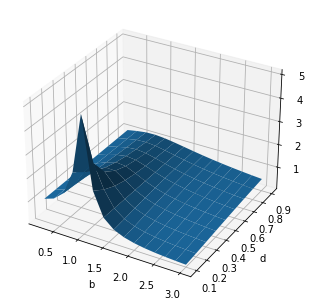

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

b = np.arange(0.2, 3.2, 0.2)
d = np.arange(0.1, 1.0, 0.1)

B, D = np.meshgrid(b, d)
nu = np.sqrt( 1 + (2*D*B)**2 ) / np.sqrt( (1-B**2)**2 + (2*D*B)**2)
print(nu.shape)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(B, D, nu)
plt.xlabel('b')
plt.ylabel('d')
plt.show()

C:\Users\anthony.couthures\AppData\Local\Temp\ipykernel_3984\143626163.py:39: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


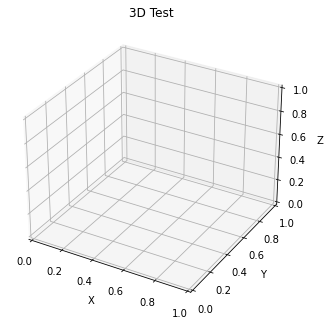

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()

(60, 60)


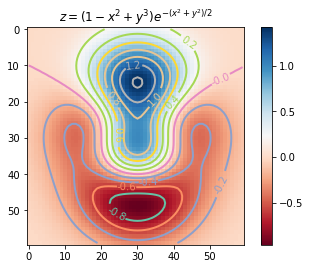

In [11]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# the function that I'm going to plot
def z_func(x,y):
 return (1-(x**2+y**3))*exp(-(x**2+y**2)/2)
 
x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid
print(Z.shape)
im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
show()

C:\Users\anthony.couthures\AppData\Local\Temp\ipykernel_3984\3856914243.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


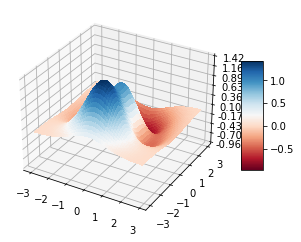

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()